In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [3]:
apple_complete= pd.read_csv(r'C:\Users\hites\OneDrive\Desktop\Datasets\AAPL.csv')

In [16]:
#remove the not required columns, and filtering only the 'Open' stock price

apple_processed= apple_complete.iloc[:,1:2].values

In [20]:
#Normalizing the data

scaler= MinMaxScaler(feature_range= (0,1))
apple_scaled= scaler.fit_transform(apple_processed)

In [28]:
#Converting the data to a time based supervised format, i.e n+1 day prediction based on n prev days

features_set=[]
labels=[]

for i in range(60,1259):
    features_set.append(apple_scaled[i-60:i,0])
    labels.append(apple_scaled[i,0])

In [33]:
#converting to numpy array

features_set, labels= np.array(features_set), np.array(labels)


(1199, 60)


In [37]:
#Converting to LSTM input shape

features_set= np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))
print(features_set.shape)

(1199, 60, 1)


In [48]:
#Building the LSTM

model= Sequential()
model.add(LSTM(units=50, return_sequences= True, input_shape=(features_set.shape[1],1)))
#return sequence=True to indicate more layers to be added to the model
#input shape consists of number of time steps and the number of indicators

model.add(Dropout(0,2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))


In [50]:
#Compiling the model

model.compile(optimizer='adam', loss= 'mean_squared_error')

In [52]:
#fit the model
model.fit(features_set, labels, epochs=100, batch_size=32)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/100





1199/1199 [==============================] - 16s 13ms/step - loss: 0.0289
Epoch 2/100
1199/1199 [==============================] - 9s 8ms/step - loss: 0.0049
Epoch 3/100
1199/1199 [==============================] - 9s 8ms/step - loss: 0.0045
Epoch 4/100
1199/1199 [==============================] - 9s 8ms/step - loss: 0.0036
Epoch 5/100
1199/1199 [==============================] - 10s 8ms/step - loss: 0.0038
Epoch 6/100
1199/1199 [==============================] - 10s 8ms/step - loss: 0.0031
Epoch 7/100
1199/1199 [==============================] - 10s 8ms/step - loss: 0.0030
Epoch 8/100
1199/1199 [==============================] - 10s 8ms/step - loss: 0.0030
Epoch 9/100
1199/1199 [==============================] - 10s 8ms/step - loss: 0.0031
Epoch 10/100
1199/1199 [==============================] - 10s 8ms/step - loss: 0.0026
Epoch 11/100
1199/1199 [=========================

1199/1199 [==============================] - 11s 9ms/step - loss: 0.0011
Epoch 74/100
1199/1199 [==============================] - 11s 9ms/step - loss: 0.0011
Epoch 75/100
1199/1199 [==============================] - 11s 9ms/step - loss: 0.0012
Epoch 76/100
1199/1199 [==============================] - 11s 10ms/step - loss: 0.0011
Epoch 77/100
1199/1199 [==============================] - 11s 9ms/step - loss: 0.0012
Epoch 78/100
1199/1199 [==============================] - 11s 9ms/step - loss: 9.2358e-04
Epoch 79/100
1199/1199 [==============================] - 11s 9ms/step - loss: 0.0010
Epoch 80/100
1199/1199 [==============================] - 11s 9ms/step - loss: 0.0010
Epoch 81/100
1199/1199 [==============================] - 10s 9ms/step - loss: 0.0011
Epoch 82/100
1199/1199 [==============================] - 11s 9ms/step - loss: 9.1722e-04
Epoch 83/100
1199/1199 [==============================] - 11s 9ms/step - loss: 0.0012
Epoch 84/100
1199/1199 [==============================] - 

In [61]:
#Testing the trained model
apple_testing= pd.read_csv(r'C:\Users\hites\OneDrive\Desktop\Datasets\AAPL_testing.csv')
apple_testing_processed=apple_testing.iloc[:,1:2].values

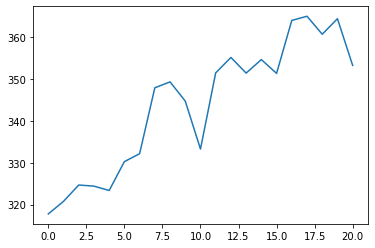

In [62]:
plt.plot(apple_testing_processed)

In [65]:
apple=pd.concat((apple_complete['Open'], apple_testing['Open']), axis=0)

In [66]:
test_inputs= apple[len(apple)-len(apple_testing)-60:].values

In [67]:
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)

In [68]:
test_features = []
for i in range(60, 80):
    test_features.append(test_inputs[i-60:i, 0])

In [69]:
test_features = np.array(test_features)
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))

In [70]:
predictions = model.predict(test_features)

In [71]:
predictions = scaler.inverse_transform(predictions)

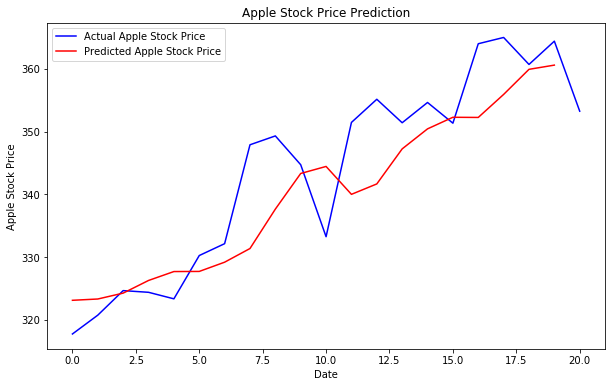

In [72]:
plt.figure(figsize=(10,6))
plt.plot(apple_testing_processed, color='blue', label='Actual Apple Stock Price')
plt.plot(predictions , color='red', label='Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()